In [8]:
#Bismillah run script after race week

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()

import datetime

%matplotlib inline

# Parameters
#### Ganti parameter ini aja langsung run

In [152]:
YEAR = 2022
RACE = 'monaco'
SESSION = 'R'

LIMIT_OUTLIER= 120

In [153]:
#color scheme
fer = ff1.plotting.team_color('ferrari')
rbr = ff1.plotting.team_color('RBR')
mer = ff1.plotting.team_color('mercedes')
alf = ff1.plotting.team_color('alfa romeo')
ast = ff1.plotting.team_color('aston martin')
mcl = ff1.plotting.team_color('mclaren')
alt = ff1.plotting.team_color('alphatauri')
wil = ff1.plotting.team_color('williams')
alp = ff1.plotting.team_color('alpine')
has = '#adadad' #has putih, ga keliatan, dibikin agak abu biar keliaan

In [154]:
ff1.Cache.enable_cache('../../cache')

In [155]:
session = ff1.get_session(YEAR, RACE, SESSION)
weekend = session.event
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']


In [156]:
HAM = session.laps.pick_driver('HAM')
RUS = session.laps.pick_driver('RUS')

VER = session.laps.pick_driver('VER')
PER = session.laps.pick_driver('PER')

LEC = session.laps.pick_driver('LEC')
SAI = session.laps.pick_driver('SAI')

NOR = session.laps.pick_driver('NOR')
PIA = session.laps.pick_driver('PIA')

OCO = session.laps.pick_driver('OCO')
GAS = session.laps.pick_driver('GAS')

TSU = session.laps.pick_driver('TSU')
DEV = session.laps.pick_driver('DEV')

ALO = session.laps.pick_driver('ALO')
STR = session.laps.pick_driver('STR')

BOT = session.laps.pick_driver('BOT')
ZHO = session.laps.pick_driver('ZHO')

ALB = session.laps.pick_driver('ALB')
SAR = session.laps.pick_driver('SAR')

MAG = session.laps.pick_driver('MAG')
HUL = session.laps.pick_driver('HUL')

In [157]:
df = pd.concat([HAM,RUS,VER,PER,LEC,SAI,NOR,
PIA,OCO,GAS,TSU,DEV,ALO,STR,BOT,ZHO,ALB,SAR,MAG,HUL])

In [158]:
df

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
448,0 days 02:06:46.280000,44,NaT,1,3,0 days 02:04:38.157000,0 days 02:04:38.015000,NaT,0 days 00:01:04.028000,0 days 00:00:31.428000,...,False,WET,1.0,False,0 days 02:04:00.206000,Mercedes,HAM,2,False,2022-05-29 14:05:00.227
449,0 days 02:09:03.589000,44,0 days 00:02:17.309000,2,3,NaT,NaT,0 days 00:00:35.195000,0 days 00:01:02.882000,0 days 00:00:39.232000,...,False,WET,2.0,False,0 days 02:06:46.280000,Mercedes,HAM,4,False,2022-05-29 14:07:46.301
450,0 days 02:10:50.586000,44,0 days 00:01:46.997000,3,3,NaT,NaT,0 days 00:00:29.047000,0 days 00:00:49.796000,0 days 00:00:28.154000,...,False,WET,3.0,False,0 days 02:09:03.589000,Mercedes,HAM,1,False,2022-05-29 14:10:03.610
451,0 days 02:12:33.895000,44,0 days 00:01:43.309000,4,3,NaT,NaT,0 days 00:00:27.750000,0 days 00:00:48.178000,0 days 00:00:27.381000,...,False,WET,4.0,False,0 days 02:10:50.586000,Mercedes,HAM,1,True,2022-05-29 14:11:50.607
452,0 days 02:14:15.657000,44,0 days 00:01:41.762000,5,3,NaT,NaT,0 days 00:00:27.032000,0 days 00:00:47.489000,0 days 00:00:27.241000,...,False,WET,5.0,False,0 days 02:12:33.895000,Mercedes,HAM,1,True,2022-05-29 14:13:33.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,0 days 02:32:29.439000,20,0 days 00:01:34.853000,16,3,NaT,NaT,0 days 00:00:25.806000,0 days 00:00:43.130000,0 days 00:00:25.917000,...,False,WET,16.0,True,0 days 02:30:54.586000,Haas F1 Team,MAG,1,True,2022-05-29 14:31:54.607
1175,0 days 02:34:04.473000,20,0 days 00:01:35.034000,17,3,NaT,NaT,0 days 00:00:25.597000,0 days 00:00:43.469000,0 days 00:00:25.968000,...,False,WET,17.0,True,0 days 02:32:29.439000,Haas F1 Team,MAG,2,True,2022-05-29 14:33:29.460
1176,0 days 02:35:38.227000,20,0 days 00:01:33.754000,18,3,NaT,NaT,0 days 00:00:25.228000,0 days 00:00:42.699000,0 days 00:00:25.827000,...,True,WET,18.0,True,0 days 02:34:04.473000,Haas F1 Team,MAG,1,True,2022-05-29 14:35:04.494
1177,0 days 02:37:15.856000,20,0 days 00:01:37.629000,19,3,NaT,NaT,0 days 00:00:25.220000,0 days 00:00:46.880000,0 days 00:00:25.529000,...,False,WET,19.0,True,0 days 02:35:38.227000,Haas F1 Team,MAG,1,True,2022-05-29 14:36:38.248


In [159]:
df.reset_index(inplace=True, drop=True)

In [160]:
#convert LapTime in timedelta64 to float in seconds
df['LapTime_seconds'] = df['LapTime'].dt.seconds*1000000 + df['LapTime'].dt.microseconds
df['LapTime_seconds'] = df['LapTime_seconds']/1000000

In [161]:
df.info()

<class 'fastf1.core.Laps'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                963 non-null    timedelta64[ns]
 1   DriverNumber        963 non-null    object         
 2   LapTime             925 non-null    timedelta64[ns]
 3   LapNumber           963 non-null    int64          
 4   Stint               963 non-null    int64          
 5   PitOutTime          58 non-null     timedelta64[ns]
 6   PitInTime           59 non-null     timedelta64[ns]
 7   Sector1Time         947 non-null    timedelta64[ns]
 8   Sector2Time         963 non-null    timedelta64[ns]
 9   Sector3Time         946 non-null    timedelta64[ns]
 10  Sector1SessionTime  947 non-null    timedelta64[ns]
 11  Sector2SessionTime  963 non-null    timedelta64[ns]
 12  Sector3SessionTime  946 non-null    timedelta64[ns]
 13  SpeedI1             905 non-null    float64   

In [162]:
# set palette dengan dictionary berdasarkan driver dan color scheme dari ff1
my_palette ={'HAM':mer,
'RUS':mer,
'VER':rbr,
'PER':rbr,
'LEC':fer,
'SAI':fer,
'NOR':mcl,
'PIA':mcl,
'OCO':alp,
'GAS':alp,
'TSU':alt,
'DEV':alt,
'ALO':ast,
'STR':ast,
'BOT':alf,
'ZHO':alf,
'ALB':wil,
'SAR':wil,
'MAG':has,
'HUL':has}

In [163]:
df.groupby("Driver")["LapTime_seconds"].mean().sort_values()

Driver
PER     88.416049
VER     88.422377
SAI     88.468016
LEC     88.518672
GAS     89.144918
NOR     89.482339
RUS     89.522613
STR     89.658565
OCO     89.909371
HAM     89.951629
ALO     89.952113
BOT     90.165839
ZHO     90.478623
TSU     91.189738
ALB     94.028630
MAG    101.100722
dtype: float64

In [164]:
# buang data yg IsAccurate == False
df = df.drop(df[df.IsAccurate == False].index)

# fine tuning, buang outlier yg ga logis
df = df.drop(df[df.LapTime_seconds > LIMIT_OUTLIER].index)

In [165]:
# untuk sorting
# ranking untuk masing-masing Driver dari nilai median() LapTime_seconds
ranks = df.groupby("Driver")["LapTime_seconds"].mean().fillna(0).sort_values(ascending=False)[::-1].index

Text(0.8, 0.2, '@primawanugroho \n(+) indicates mean \nblack line indicates median')

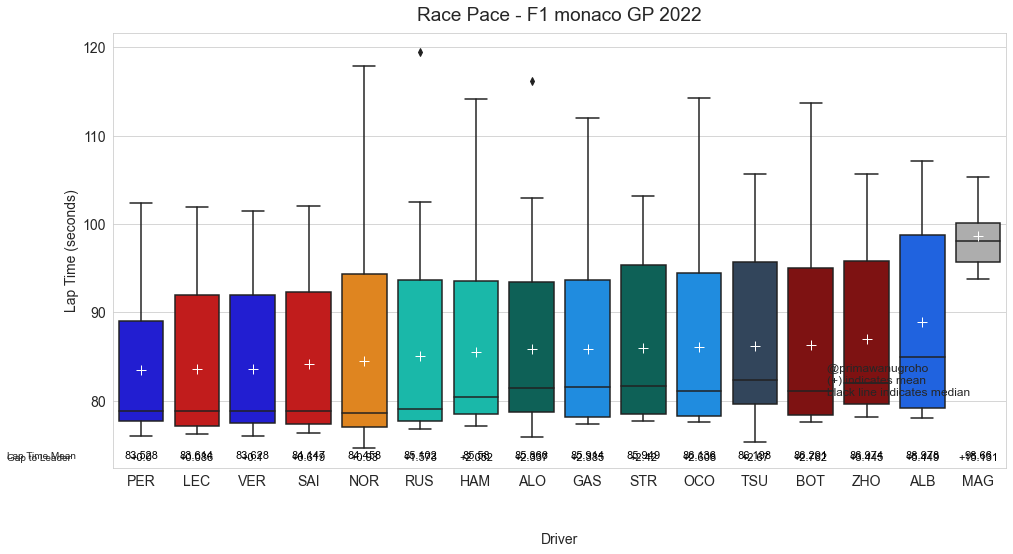

In [166]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = sns.boxplot(data=df, x='Driver', y='LapTime_seconds', order=ranks, palette=my_palette, showmeans=True,
                meanprops={"marker": "+",
                       "markeredgecolor": "white",
                       "markersize": "10"})

ax.set_title(f"Race Pace - F1 {RACE} GP {YEAR}")
ax.set_ylabel('Lap Time (seconds)', fontsize=14)
ax.set_xlabel('Driver', fontsize=14)
ax.xaxis.set_label_coords(.5, -.15)

means = df.groupby("Driver")["LapTime_seconds"].mean().sort_values()

# label mean LapTime
ax.text(-2.4, df.LapTime_seconds.min()-1.2, "Lap Time Mean")
for xtick in ax.get_xticks():
    ax.text(xtick,
            df.LapTime_seconds.min()-1.2, #adjust y value offset disini
            round(means[xtick], 3),
            horizontalalignment = 'center',
            size = 11,
            color = 'black')
    
# Label mean LapTime gap to leader
leader_mean = means[0]
ax.text(-2.4, df.LapTime_seconds.min()-1.45, "Gap to Leader")
for xtick in ax.get_xticks():
    ax.text(xtick,
            df.LapTime_seconds.min()-1.45, #adjust y value offset disini
            "+" + str(round(means[xtick] - leader_mean, 3)),
            horizontalalignment = 'center',
            size = 11,
            color = 'black')

ax.text(0.8, 0.2,'@primawanugroho \n(+) indicates mean \nblack line indicates median',
        ha='left', va='center', fontsize=12, transform=ax.transAxes)

#plt.savefig(f"boxplot - {RACE} GP {YEAR}.jpg", dpi=600, bbox_inches='tight')

In [167]:
df.LapTime_seconds.max() - df.LapTime_seconds.min()

44.72

In [168]:
df.LapTime_seconds

3      103.309
4      101.762
5      101.114
6      100.478
7       99.745
        ...   
957     95.062
958     94.853
959     95.034
960     93.754
961     97.629
Name: LapTime_seconds, Length: 773, dtype: float64

In [ ]:
# monaco 48.792
